In [6]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [7]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=['_April06_13_56_06_.csv', '_April10_13_36_44_.csv','_May24_13_38_53_.csv']
#csv_files=['_March29_18_58_37_.csv']
print(csv_files)


['_April04_17_16_55_.csv', '_April06_13_56_06_.csv', '_April10_13_36_44_.csv', '_April16_16_41_25_.csv', '_April23_14_41_54_.csv', '_April24_19_14_20_.csv', '_April25_13_41_37_.csv', '_April26_10_09_42_.csv', '_April27_16_36_32_.csv', '_March21_10_50_01_.csv', '_March29_18_58_37_.csv', '_May06_20_45_05_.csv', '_May11_14_39_59_.csv', '_May17_12_08_49_.csv', '_May20_14_13_00_.csv', '_May24_13_38_53_.csv']
['_April06_13_56_06_.csv', '_April10_13_36_44_.csv', '_May24_13_38_53_.csv']


In [8]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata\_April06_13_56_06_.csv
./logs/modeldata\_April10_13_36_44_.csv
./logs/modeldata\_May24_13_38_53_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        75.496117  0.309057   0.747178               500  active learning   
1        81.794651  0.584500   0.769042              1000  active learning   
2        83.951682  0.551821   0.883408              1500  active learning   
3        84.843256  0.637722   0.830900              2000  active learning   
4        83.520276  0.647059   0.780405              2500  active learning   
..             ...       ...        ...               ...              ...   
995      84.407365  0.526820   0.919732              3000  active learning   
996      85.529344  0.590038   0.891462              3500  active learning   
997      86.478711  0.636973   0.879630              4000  active learning   
998      86.651323  0.636015   0.887701              4500  active learning   
999      86.536249  0.61

# learning curves

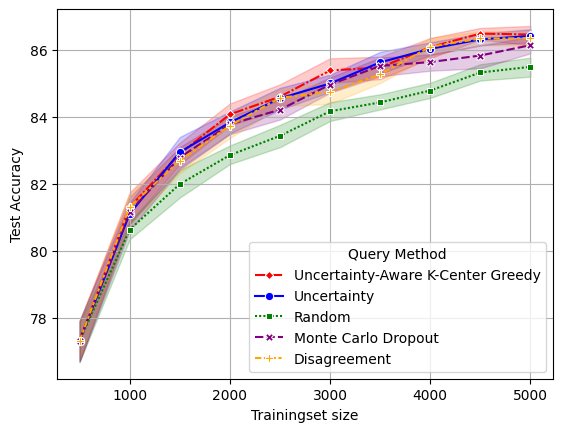

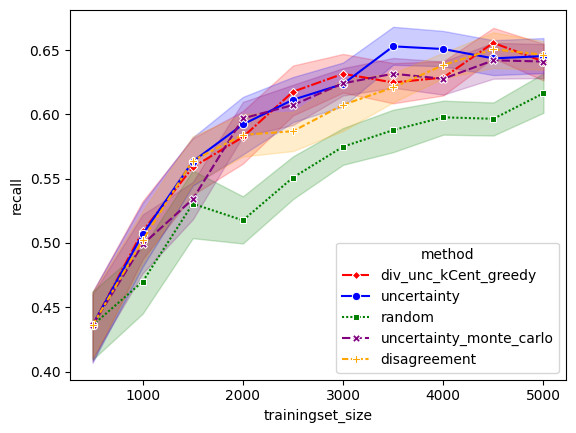

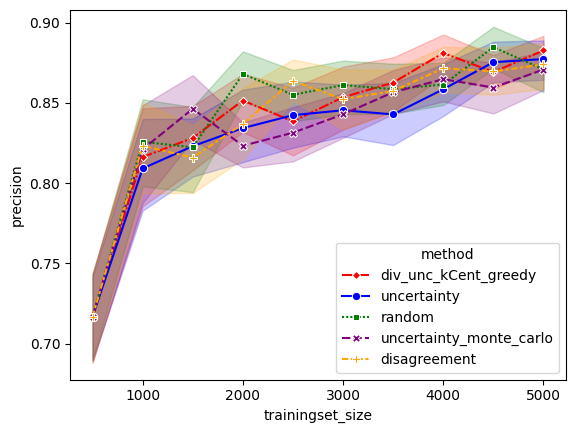

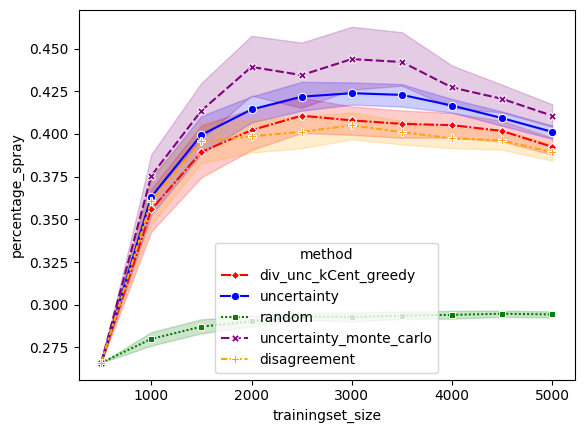

In [9]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']


linesyles = {
    'div_unc_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}
desired_order = [
    'div_unc_kCent_greedy',   
    'uncertainty',
    'random',
   'uncertainty_monte_carlo',
   'disagreement',
   
]
palette = {
    'div_unc_kCent_greedy': 'red',   
    'uncertainty': 'blue',
    'random': 'green',
   'uncertainty_monte_carlo': 'purple',
   'disagreement': 'orange',
   
}
df['method'] = df['method'].replace('divers_uncer_kCent_greedy', 'div_unc_kCent_greedy')
value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',   
    'uncertainty': 'Uncertainty',
    'random': 'Random',
   'uncertainty_monte_carlo': 'Monte Carlo Dropout',
   'disagreement': 'Disagreement'
}

fig=sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method",palette=palette,style='method',markers=True,hue_order=desired_order)
handles, labels = fig.get_legend_handles_labels()


value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',   
    'uncertainty': 'Uncertainty',
    'random': 'Random',
   'uncertainty_monte_carlo': 'Monte Carlo Dropout',
   'disagreement': 'Disagreement'
}


new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('Test Accuracy')
plt.grid(True) 
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method",palette=palette,style='method',markers=True,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method",palette=palette,style='method',markers=True,hue_order=desired_order)
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method",palette=palette,style='method',markers=True,hue_order=desired_order)
plt.show()
#for i in range(10):

 #   sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method",palette=palette)
  #  plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")



In [10]:
from scipy import stats
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']


df_filtered = df[df['trainingset_size'] == 5000]

summary_stats = df_filtered.groupby('method').agg(
    mean_accuracy=('test accuracy', 'mean'),
    std_accuracy=('test accuracy', 'std'),
    count=('test accuracy', 'count')
).reset_index()

summary_stats['confidence_interval'] = summary_stats.apply(
    lambda row: stats.t.ppf(1 - (1 - 0.95) / 2, df=row['count'] - 1) * row['std_accuracy'] / np.sqrt(row['count']), axis=1
)

summary_stats['lower_bound'] = summary_stats['mean_accuracy'] - summary_stats['confidence_interval']
summary_stats['upper_bound'] = summary_stats['mean_accuracy'] + summary_stats['confidence_interval']

value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',
    'uncertainty': 'Uncertainty',
    'random': 'Random',
    'uncertainty_monte_carlo': 'Monte Carlo Dropout',
    'disagreement': 'Disagreement'
}

summary_stats['method'] = summary_stats['method'].replace(value_replacements)

summary_stats_sorted = summary_stats.sort_values(by='mean_accuracy', ascending=False)


summary_stats_sorted['accuracy_with_error'] = summary_stats_sorted.apply(
    lambda row: f"{row['mean_accuracy']:.2f} $\\pm$ {(row['confidence_interval']):.2f}", axis=1
)


latex_df_final_sorted = summary_stats_sorted[['method', 'accuracy_with_error']]


latex_table_final_sorted = latex_df_final_sorted.to_latex(index=False, header=['Query Method', 'Accuracy at 5000'], escape=False)
print(latex_table_final_sorted)


\begin{tabular}{ll}
\toprule
Query Method & Accuracy at 5000 \\
\midrule
Uncertainty-Aware K-Center Greedy & 86.46 $\pm$ 0.31 \\
Uncertainty & 86.42 $\pm$ 0.23 \\
Disagreement & 86.35 $\pm$ 0.25 \\
Monte Carlo Dropout & 86.14 $\pm$ 0.26 \\
Random & 85.50 $\pm$ 0.32 \\
\bottomrule
\end{tabular}



In [11]:
def calculate_f1_scores(row):
    precision_A = row['precision']
    recall_A = row['recall']
    class_ratio_A = 0.297
    N_A = class_ratio_A
    N_B = 1 - class_ratio_A
    TP_A = recall_A * N_A
    FN_A = N_A - TP_A
    FP_A = (TP_A / precision_A) - TP_A
    TN_A = N_B - FP_A
    precision_B = TN_A / (TN_A + FN_A)
    recall_B = TN_A / (TN_A + FP_A)
    f1_A = 2 * (precision_A * recall_A) / (precision_A + recall_A)
    f1_B = 2 * (precision_B * recall_B) / (precision_B + recall_B)
    return pd.Series({'f1_A': f1_A, 'f1_B': f1_B})

df[['f1_spray', "f1_don't"]] = df.apply(calculate_f1_scores, axis=1)

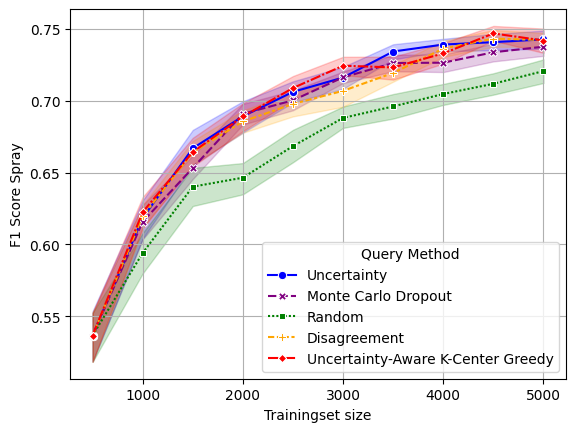

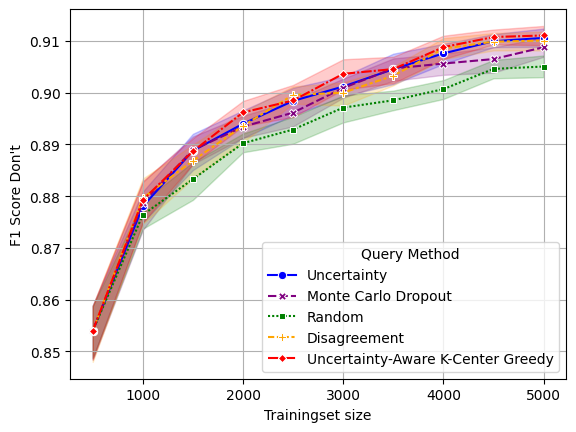

In [12]:
fig=sns.lineplot(data=df, x="trainingset_size", y="f1_spray", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel('F1 Score Spray')
plt.grid(True) 
plt.show()
fig=sns.lineplot(data=df, x="trainingset_size", y="f1_don't", hue="method",palette=palette,style='method',markers=True)
handles, labels = fig.get_legend_handles_labels()
new_labels = [value_replacements.get(label, label) for label in labels]
fig.legend(handles, new_labels, title="Query Method")
plt.xlabel('Trainingset size')
plt.ylabel("F1 Score Don't")
plt.grid(True) 
plt.show()

# Influence input resolution

In [13]:

columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']


df_filtered = df[df['trainingset_size'] == 5000]

summary_stats = df_filtered.groupby('method').agg(
    mean_accuracy=('test accuracy', 'mean'),
    std_accuracy=('test accuracy', 'std'),
    count=('test accuracy', 'count')
).reset_index()

summary_stats['confidence_interval'] = summary_stats.apply(
    lambda row: stats.t.ppf(1 - (1 - 0.95) / 2, df=row['count'] - 1) * row['std_accuracy'] / np.sqrt(row['count']), axis=1
)

summary_stats['lower_bound'] = summary_stats['mean_accuracy'] - summary_stats['confidence_interval']
summary_stats['upper_bound'] = summary_stats['mean_accuracy'] + summary_stats['confidence_interval']

value_replacements = {
    'div_unc_kCent_greedy': 'Uncertainty-Aware K-Center Greedy',
    'uncertainty': 'Uncertainty',
    'random': 'Random',
    'uncertainty_monte_carlo': 'Monte Carlo Dropout',
    'disagreement': 'Disagreement'
}

summary_stats['method'] = summary_stats['method'].replace(value_replacements)

summary_stats_sorted = summary_stats.sort_values(by='mean_accuracy', ascending=False)


summary_stats_sorted['accuracy_with_error'] = summary_stats_sorted.apply(
    lambda row: f"{row['mean_accuracy']:.2f} $\\pm$ {(row['confidence_interval']):.2f}", axis=1
)


latex_df_final_sorted = summary_stats_sorted[['method', 'accuracy_with_error']]


latex_table_final_sorted = latex_df_final_sorted.to_latex(index=False, header=['Query Method', 'Accuracy at 5000'], escape=False)
print(latex_table_final_sorted)


\begin{tabular}{ll}
\toprule
Query Method & Accuracy at 5000 \\
\midrule
Uncertainty-Aware K-Center Greedy & 86.46 $\pm$ 0.31 \\
Uncertainty & 86.42 $\pm$ 0.23 \\
Disagreement & 86.35 $\pm$ 0.25 \\
Monte Carlo Dropout & 86.14 $\pm$ 0.26 \\
Random & 85.50 $\pm$ 0.32 \\
\bottomrule
\end{tabular}

